# US Baby Names 1880-2010

The baby names datasets are contained in the acompanying folder ./names (or [download here](http://www.ssa.gov/oact/babynames/limits.html)) they contain a list of the most frequent names given to newborn babies in the United States each year.
There are many things you might want to do with the dataset:

* Visualize the proportion of babies given a particular name (your own, or another name) over time.
* Determine the relative rank of a name.
* Determine the most popular names in each year or the names with largest increases or decreases.
* Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters.
* Analyze external sources of trends: biblical names, celebrities, demographic changes.

In this exercise you are tasked with undertaking some analysis. I have started some of the steps for you and I have given some tips on what methods to use.


## Task 1: Import Data

As with most analysis we will need to import some libraries. For this analyis we want to reading the data, perform analysis and visualise the data. therefore the Pandas and matplotlib libraries are needed.

In [8]:
import pandas as pd
import matplotlib as mp


            Appear
count  2000.000000
mean    100.742000
std     466.108304
min       5.000000
25%       7.000000
50%      13.000000
75%      41.250000
max    9655.000000


First open a single file 1880 set the field headings to'name', 'sex', 'births' (hint use the pandas read_csv method)

In [27]:


filename = 'names/yob1880.txt' 

names = ['name', 'sex', 'births' ]
data = pd.read_csv(filename, names=names)

print(data)

           name sex  births
0          Mary   F    7065
1          Anna   F    2604
2          Emma   F    2003
3     Elizabeth   F    1939
4        Minnie   F    1746
...         ...  ..     ...
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[2000 rows x 3 columns]


Now display the top 5 rows

In [26]:


print(data.head(5))

        name sex  births
0       Mary   F    7065
1       Anna   F    2604
2       Emma   F    2003
3  Elizabeth   F    1939
4     Minnie   F    1746


Often datasets span more than one file. 

In this example each year is in a seperate file, we need to combines all of this year data into a single pandas DataFrame and add a *year* field. Note that all .txt files must be stored as *./names*.

This is a little challenging so I have completed this task below, make sure you understand how the code below operates.

In [3]:
years = range(1880, 2013)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)


Now display the first 5 records from the combined dataframe

In [25]:


print(names.head(5))


        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880


## Task 2: Descriptive Statistics

Descriptive statistics can give you great insight into the properties of each attribute. Often you can create more summaries than you have time to review. 

Display the following summary statistics.

    Count.
    Mean.
    Standard Deviation.
    Minimum Value.
    25th Percentile.
    50th Percentile (Median). 75th Percentile.
    Maximum Value.



In [35]:
# Statistical Summary
from pandas import read_csv
from pandas import set_option

years = range(1880, 2013)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

# set_option('display.width', 100)
# set_option('precision', 3)

names = pd.concat(pieces, ignore_index=True)


description = frame.describe()
print(description)







             births     year
count  33732.000000  33732.0
mean     108.219554   2012.0
std      681.502472      0.0
min        5.000000   2012.0
25%        7.000000   2012.0
50%       11.000000   2012.0
75%       30.000000   2012.0
max    22304.000000   2012.0


## Task 3: Data Aggregation

We can now perform several types of aggregation. 

Create a new DataFrame containing the total number of births per year, split by sex. 

(Hint use the pivot_table method with the aggragate function sum property)

In [55]:

table = names.pivot_table(index='year' ,columns='sex', values='births', aggfunc='sum' )
print(table)

sex         F        M
year                  
1880    90993   110491
1881    91953   100743
1882   107847   113686
1883   112319   104627
1884   129020   114442
...       ...      ...
2008  1888607  2037751
2009  1834599  1981039
2010  1774758  1915942
2011  1756004  1895910
2012  1757328  1893134

[133 rows x 2 columns]


Now display the first 5 records from the combined dataframe. Hint you can use the head() method.

In [56]:
print(table.head(5))

sex        F       M
year                
1880   90993  110491
1881   91953  100743
1882  107847  113686
1883  112319  104627
1884  129020  114442


## Task 4: Data Visualisation

Using the *plot* function draw a figure to illustrate this DataFrame. 

Plot the genders in 2 seperate lines with year on the X axis and the number of births on the Y axis, Don't forget a title and axis labels.

<Figure size 640x480 with 0 Axes>

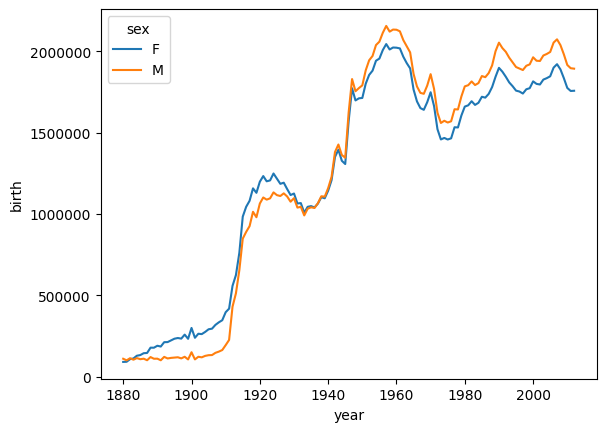

In [71]:
from matplotlib import pyplot

pyplot.figure()
table = names.pivot_table(index='year' ,columns='sex', values='births', aggfunc='sum' )

table.plot(kind='line')

pyplot.xlabel('year')
pyplot.ylabel('birth')
pyplot.ticklabel_format(style='plain')






## Task 5: More Data Aggregation

Now we would like to analyse how frequently the names *John*, *Michael*, *Mary*, *Mark*,*Jeremy* and *Amelia* occurr over time.

Redefine *total_births*, this time aggregating data by *name* rather than *sex*.

Then define the subset of names that we are interested

Finally plot each name in its own graph.

In [82]:

from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot

years = range(1880, 2013)
pieces = []
columns = ['name', 'sex', 'births']


for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

table = names.pivot_table(index='name' ,columns='sex', values='births', aggfunc='sum' )

index = ['John', 'Michael', 'Mary', 'Mark', 'Jeremy', 'Amelia']
# table.loc['John', 'names']

print(table)









sex           F      M
name                  
Aaban       NaN   42.0
Aabha      12.0    NaN
Aabid       NaN    5.0
Aabriella   5.0    NaN
Aadam       NaN  161.0
...         ...    ...
Zytavion    NaN    5.0
Zytavious   NaN   43.0
Zyvion      NaN    5.0
Zyyanna     6.0    NaN
Zzyzx       NaN    5.0

[91416 rows x 2 columns]


## Task 6: Data Distrabution

Next we need to look at how the distribution of boy names by final letter has changed over the last 100 years. 

To see this, first aggregate all of the births in the full dataset by year, sex, and final letter.

(This is a bit tricky so I have done some of the difficult bits)

In [10]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births',last_letters,['sex', 'year'], aggfunc=sum)


Then we select a few representative years 1912, 1962, 2012, spanning 100 years in total, display the first 5 records in a table:

(Hint: use the reindex method https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html)

Now, we normalize the table by the number of births, so as to obtain the proportion of total births for each sex ending in each letter: 

There are functions in python for normalisation but we haven't covered them yet. Here we will just simply divide each value by the aggragated sum for that table. i.e. divide each subtable by the total 

In [12]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop.head()

sex                 F                             M                    
year             1912      1962      2012      1912      1962      2012
last_letter                                                            
a            0.267288  0.347073  0.372450  0.003849  0.002577  0.014368
b                 NaN  0.000233  0.000268  0.002147  0.001672  0.018333
c                 NaN  0.000037  0.000703  0.002449  0.008644  0.012819
d            0.018854  0.001868  0.001440  0.125806  0.120849  0.022427
e            0.323448  0.215983  0.182395  0.127262  0.079738  0.067840

Finally make <b>bar plots</b> for each sex broken-down by year


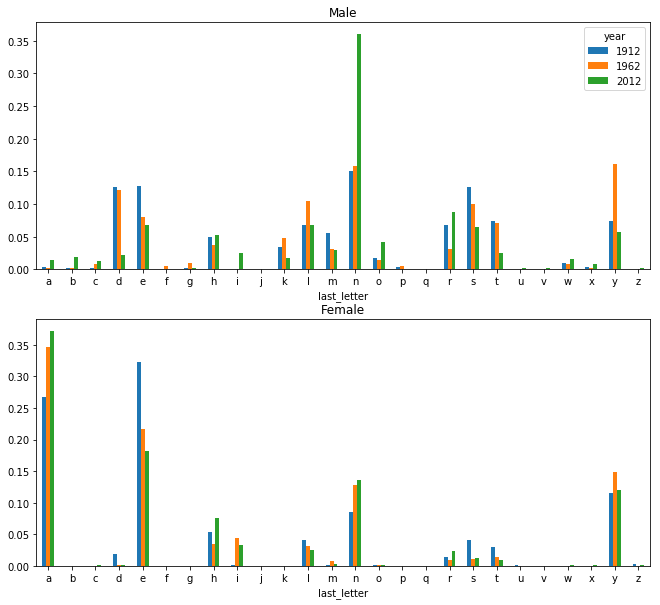

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)
